In [32]:
import pandas as pd
import numpy as np
from scipy import stats

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [4]:
# astros2016 = pd.read_csv("data/HOU2016.csv")
astros2017 = pd.read_csv("data/HOU2017.csv")
# astros2018 = pd.read_csv("data/HOU2018.csv")
# astros2019 = pd.read_csv("data/HOU2019.csv")
yankees2017 = pd.read_csv("data/NYY2017.csv")
dodgers2017 = pd.read_csv("data/LAD2017.csv")
redsox2017 = pd.read_csv("data/BOS2017.csv")


In [5]:
def boolhome(df):
    df.dropna(axis="index", how="all", inplace=True, subset=['Gtm'])
    df.rename(columns={"Unnamed: 3":"Home"}, inplace=True)
    df.replace({"Home":{"@": False, np.nan: True}}, inplace=True)
    df.drop("Unnamed: 0", axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['GmeSc'] = df['Opp. Starter (GmeSc)'].apply(lambda x: x[-3:-1])
    df['SoAb'] = df['SO'] / df["AB"]
    df['BbAb'] = df['BB'] / df["AB"]
#     df['bbsum'] = df["BB"] + df['SO']
    #df['GmeSc'].apply(lambda x: x.astype(int))
    return df

In [6]:
astros2017df = boolhome(astros2017)
# astros2018df = boolhome(astros2018)
# astros2019df = boolhome(astros2019)
# astros2016df = boolhome(astros2016)
yankees2017df = boolhome(yankees2017)
dodgers2017df = boolhome(dodgers2017)
redsox2017df = boolhome(redsox2017)

In [7]:
columns = astros2017df.columns

In [8]:
# astros2017df['so/at'] = astros2017df['SO'] / astros2017df["AB"]
# astros2017df['bb/at'] = astros2017df['BB'] / astros2017df["AB"]
# astros2017df['bbsum'] = astros2017df["BB"] + astros2017df['SO']

In [9]:
#astros2017df.head()

In [10]:
#astros2017df.info

In [11]:
#astros2017df.head()

In [12]:
# astros2017df.dropna(axis="index", how="all", inplace=True)

In [13]:
#astros2017df.head()

In [14]:
#astros2017df.tail()

In [15]:
#astros2017df.describe()

In [16]:
#astros2017df.OBP
#yankees2017df.OBP

In [17]:
# #astros2017df.OBP.plot.line()
# #yankees2017df.OBP.plot.line()
# dodgers2017df.OBP.plot.line()
# #redsox2017df.OBP.plot.line();

In [18]:
#dodgers2017df.head(10)

# GROUPBY home/away

In [19]:
astros_home_gb = astros2017df.groupby("Home")
yankees_home_gb = yankees2017df.groupby("Home")
dodgers_home_gb = dodgers2017df.groupby("Home")
redsox_home_gb = redsox2017df.groupby("Home")

* ## OBP advantage

In [20]:
astros_home_obp = astros_home_gb.get_group(True).OBP
astros_away_obp = astros_home_gb.get_group(False).OBP

In [21]:
type(astros_home_obp)

pandas.core.series.Series

In [22]:
# yankees_home_obp = yankees_home_gb.get_group(True).OBP
# yankees_away_obp = yankees_home_gb.get_group(False).OBP

In [20]:
# dodgers_home_obp = dodgers_home_gb.get_group(True).OBP
# dodgers_away_obp = dodgers_home_gb.get_group(False).OBP

In [24]:
# redsox_home_obp = redsox_home_gb.get_group(True).OBP
# redsox_away_obp = redsox_home_gb.get_group(False).OBP

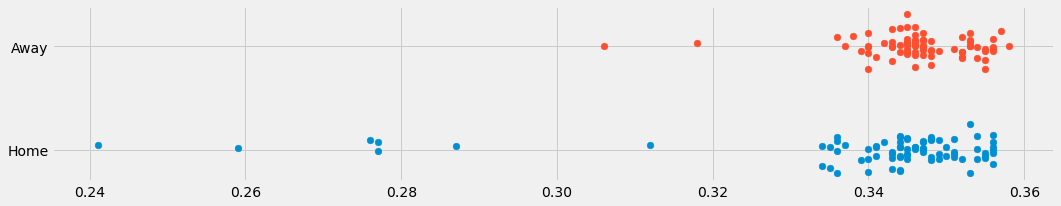

In [46]:
# heights: matt vs nick
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(astros_home_obp, 
           np.repeat(0, len(astros_home_obp)) + \
           np.random.normal(0, 0.1, len(astros_home_obp)), ## jitter
           s=45)
ax.scatter(astros_away_obp, 
           np.repeat(1, len(astros_away_obp)) + \
           np.random.normal(0, 0.1, len(astros_home_obp)), 
           s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Home", "Away"]);

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the OBP between HOME and AWAY games.

**Alternative:** There is a difference in the OBP between HOME and AWAY games.

In [25]:


def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [48]:
test_statistic = welch_test_statistic(astros_home_obp, astros_away_obp)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -2.51


In [49]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [50]:
df = welch_satterhwaithe_df(astros_home_obp, astros_away_obp)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 99.19


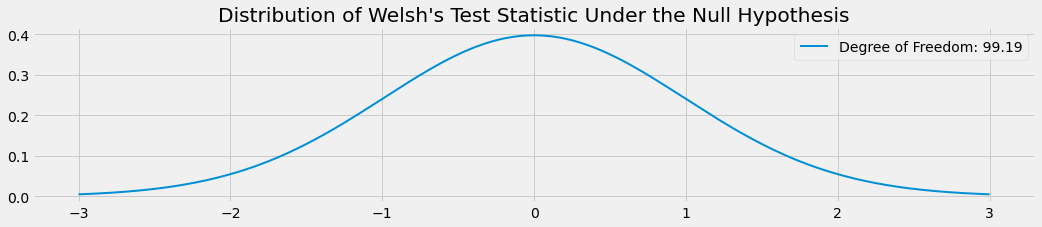

In [39]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

**Also, the above is not always true!**  The $T$ statistic only has a t-distribution **under the assumption that the population distributions are Normal**!  

# is this why my plots look weighted towards one side? is my sample normally distributed? Is OBP NOT normally distributed because it's a rolling average?

If the population is very non-normal, the properties of the t-test **will fail**.  You must have some legitimate a-priori reason to believe the populations are approximately normal to use a t-test!


#### Set Significance level

Given the the love I have for my childhood baseball tea (and in a sense my childhood) that's at stake here, and how much they value to friendship, I decide to be reasonably skeptical, so take $\alpha = 0.05$.

#### Calculate p-value


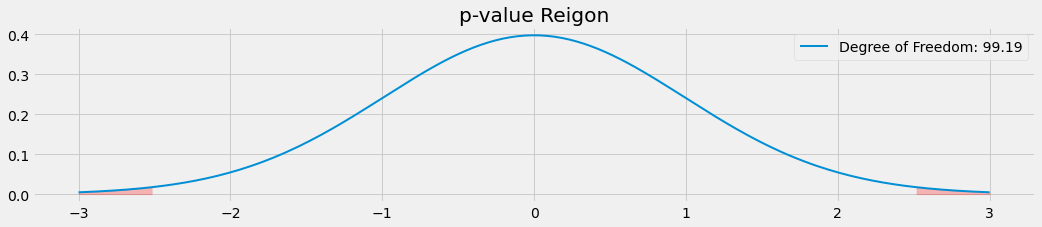

In [40]:
# p-val
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");

In [42]:
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average kickflip height: {:2.2f}".format(p_value))

p-value for different average kickflip height: 0.01


# 0.01 < 0.05 --> there is a statistical difference between HOME and AWAY games.

In [53]:
test_statistic = welch_test_statistic(astros_home_obp, astros_away_obp)

p_value = 1 - students.cdf(test_statistic)
print("p-value for the OBP for HOME games greater than AWAY games: {:2.3f}".format(p_value))

p-value for the OBP for HOME games greater than AWAY games: 0.993


### So the astros did have a statistically better OBP at HOME than AWAY. but that's to be expected.

## How do I compare the advantages of these other teams HOME/AWAY OBP split to the astros???

# WAIT! They had a better OPB for AWAY games than HOME games. I need to try a different stat...

In [22]:
#OBP for 2017 season
print(astros2017df.OBP.median())
# print(yankees2017df.OBP.median())
# print(dodgers2017df.OBP.median())
# print(redsox2017df.OBP.median())

0.34600000000000003
0.34
0.341
0.335


In [23]:
#OBP for 2017 home games
print(astros_home_obp.mean())
# print(yankees_home_obp.mean())
# print(dodgers_home_obp.mean())
# print(redsox_home_obp.mean())

0.3400370370370371
0.34225925925925904
0.34209876543209866
0.3364197530864195


In [24]:
#OBP for 2017 away games
print(astros_away_obp.mean())
# print(yankees_away_obp.mean())
# print(dodgers_away_obp.mean())
# print(redsox_away_obp.mean())

0.3463950617283951
0.3403950617283949
0.3397160493827161
0.3374444444444443


In [25]:
#home.get_group(True).OBP.plot.line()

home:0.3400370370370371
away:0.3463950617283951


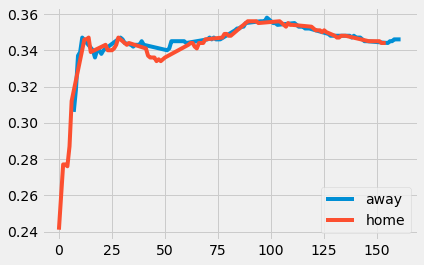

In [58]:
astros_away_obp.plot.line(label="away")
astros_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{astros_home_obp.mean()}')
print(f'away:{astros_away_obp.mean()}')


home:0.34225925925925904
away:0.3403950617283949


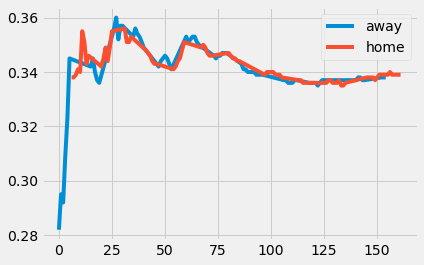

In [59]:
yankees_away_obp.plot.line(label="away")
yankees_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{yankees_home_obp.mean()}')
print(f'away:{yankees_away_obp.mean()}');

home:0.34209876543209866
away:0.3397160493827161


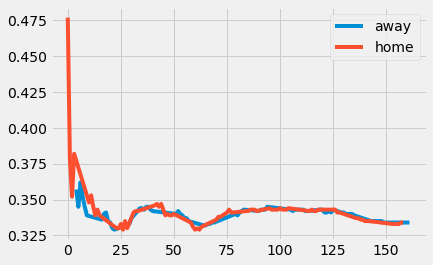

In [61]:
dodgers_away_obp.plot.line(label="away")
dodgers_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{dodgers_home_obp.mean()}')
print(f'away:{dodgers_away_obp.mean()}');

home:0.3364197530864195
away:0.3374444444444443


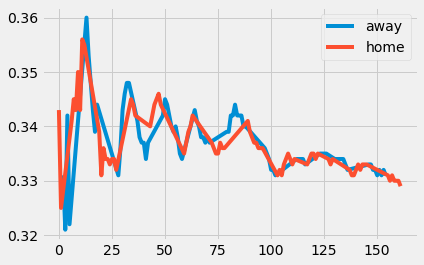

In [62]:
redsox_away_obp.plot.line(label="away")
redsox_home_obp.plot.line(label="home")
plt.legend()
print(f'home:{redsox_home_obp.mean()}')
print(f'away:{redsox_away_obp.mean()}');

#### Is On Base Percentage (OBP) a rolling/weighted average? Can I parce HOME vs AWAY games? Should I consider a different stat like Strikeouts (SO)?

* ## SO advantage
fewer stikeouts/game
expect: astros to have fewer strikeouts than the field

In [63]:
astros_home_so = astros_home_gb.get_group(True).SO
astros_away_so = astros_home_gb.get_group(False).SO

In [64]:
# yankees_home_so = yankees_home_gb.get_group(True).SO
# yankees_away_so = yankees_home_gb.get_group(False).SO

In [65]:
# dodgers_home_so = dodgers_home_gb.get_group(True).SO
# dodgers_away_so = dodgers_home_gb.get_group(False).SO

In [66]:
# redsox_home_so = redsox_home_gb.get_group(True).SO
# redsox_away_so = redsox_home_gb.get_group(False).SO

In [67]:
astros_home_so_desc = astros_home_so.describe()

In [68]:
#astros_home_so_desc

In [69]:
print(astros_home_so.mean())
# print(yankees_home_so.mean())
# print(dodgers_home_so.mean())
# print(redsox_home_so.mean())

# list_field_home_so = [yankees_home_so.mean(), dodgers_home_so.mean(), redsox_home_so.mean()]
# arr_field_home_so = np.array(list_field_home_so)

# print((astros_home_so.mean() - arr_field_home_so.mean()))

# arr_field_home_so.mean()


6.197530864197531
8.407407407407407
8.37037037037037
7.283950617283951
-1.8230452674897117


8.020576131687243

In [70]:
print(astros_away_so.mean())
# print(yankees_away_so.mean())
# print(dodgers_away_so.mean())
# print(redsox_away_so.mean())

# list_field_away_so = [yankees_away_so.mean(), dodgers_away_so.mean(), redsox_away_so.mean()]
# arr_field_away_so = np.array(list_field_away_so)

# print((astros_home_so.mean() - arr_field_away_so.mean()))

# arr_field_away_so.mean()

7.222222222222222
8.703703703703704
8.666666666666666
7.827160493827161
-2.2016460905349797


8.39917695473251

some plot attempts

In [71]:
# plt.hist(astros_home_so)
# plt.hist(yankees_home_so)
# plt.hist(dodgers_home_so)
# plt.hist(redsox_home_so)
#print(abs(astros_home_so.mean() - yankees_home_so.mean()))
#plt.hist([astros_home_so.mean(), yankees_home_so.mean(), dodgers_home_so.mean(), redsox_home_so.mean()])

In [72]:
# astros_home_so.plot.bar()
# yankees_home_so.plot.bar()
# abs(astros_home_so - yankees_home_so).plot.bar()

* ## SS/AB
new stat: strikeouts/at bats
expect to be lower than the field

In [55]:
astros_home_SoAb = astros_home_gb.get_group(True).SoAb
astros_away_SoAb = astros_home_gb.get_group(False).SoAb

In [56]:
# yankees_home_SoAb = yankees_home_gb.get_group(True).SoAb
# yankees_away_SoAb = yankees_home_gb.get_group(False).SoAb

In [57]:
# dodgers_home_SoAb = dodgers_home_gb.get_group(True).SoAb
# dodgers_away_SoAb = dodgers_home_gb.get_group(False).SoAb

In [58]:
# redsox_home_SoAb = redsox_home_gb.get_group(True).SoAb
# redsox_away_SoAb = redsox_home_gb.get_group(False).SoAb

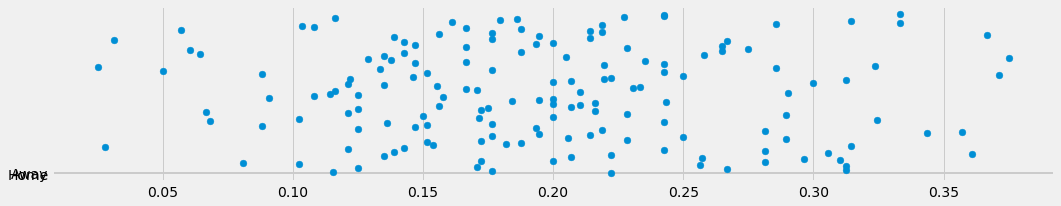

In [120]:
# SS/AB HOME vs. AWAY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(astros2017df.SoAb, astros2017df.Date,
#            np.repeat(0, len(astros_home_SoAb)) + \
#            np.random.normal(0, 0.1, len(astros_home_SoAb)), ## jitter
           s=45)
# ax.scatter(astros_away_SoAb, astros2017df.Date,
#            np.repeat(1, len(astros_away_SoAb)) + \
# #            np.random.normal(0, 0.1, len(astros_away_SoAb)), 
#            s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Home", "Away"]);

TypeError: hist() got multiple values for argument 'bins'

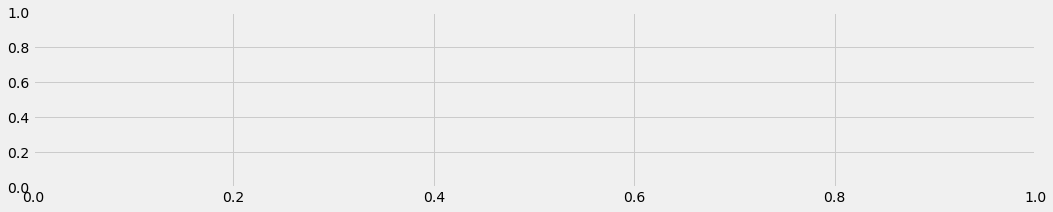

In [124]:
# SS/AB HOME vs. AWAY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.hist(astros2017df.Date,astros2017df.SoAb, bins=162)
#            np.repeat(0, len(astros_home_SoAb)) + \
#            np.random.normal(0, 0.1, len(astros_home_SoAb)), ## jitter
#            s=45)
# ax.scatter(astros_away_SoAb, astros2017df.Date,
#            np.repeat(1, len(astros_away_SoAb)) + \
# #            np.random.normal(0, 0.1, len(astros_away_SoAb)), 
#            s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Home", "Away"]);

(array([ 5.,  8., 18., 25., 29., 32., 17., 11., 11.,  6.]),
 array([0.025, 0.06 , 0.095, 0.13 , 0.165, 0.2  , 0.235, 0.27 , 0.305,
        0.34 , 0.375]),
 <BarContainer object of 10 artists>)

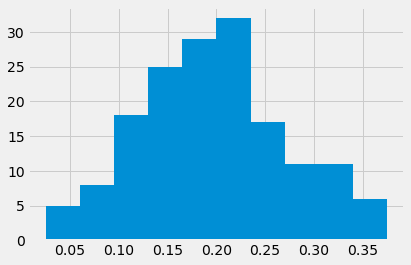

In [110]:
# SS/AB HOME vs. AWAY
fig, ax = plt.subplots(1,1)

ax.hist(astros2017df.SoAb)
# ax.hist(astros_home_SoAb, bins=90)
# ax.hist(astros_away_SoAb, alpha=.5, bins=90)
# ax.hist(astros2017df.Date)
# ax.legend(["Home", "Away"]);

0       Apr 3
1       Apr 4
2       Apr 5
3       Apr 6
4       Apr 7
        ...  
157    Sep 27
158    Sep 28
159    Sep 29
160    Sep 30
161     Oct 1
Name: Date, Length: 162, dtype: object

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the SS/AB between HOME and AWAY games.

**Alternative:** There is a difference in the SS/AB between HOME and AWAY games.

In [88]:
test_statistic = welch_test_statistic(astros_home_SoAb, astros_away_SoAb)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -1.29


In [89]:
df = welch_satterhwaithe_df(astros_home_SoAb, astros_away_SoAb)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 156.67


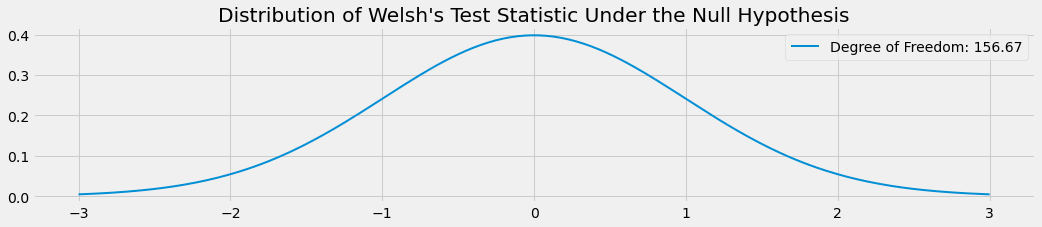

In [90]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

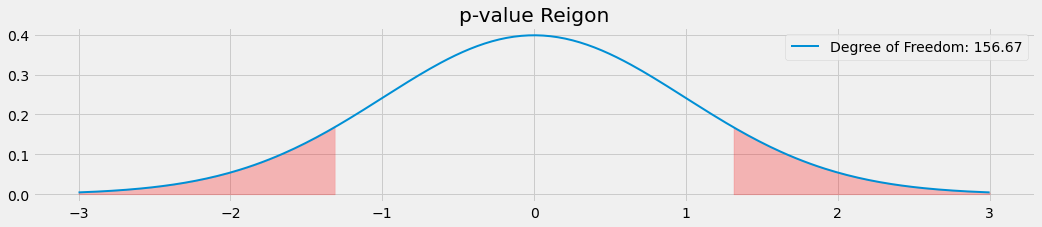

In [91]:
# p-val
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df) #stats.t_ind()
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");

In [92]:
p_value = students.cdf(-test_statistic) + (1 - students.cdf(test_statistic))
print("p-value for different SS/AB: {:2.2f}".format(p_value))

p-value for different SS/AB: 1.80


In [93]:
test_statistic = welch_test_statistic(astros_home_SoAb, astros_away_SoAb)

p_value = 1 - students.cdf(test_statistic)
print("p-value for the OBP for HOME games greater than AWAY games: {:2.3f}".format(p_value))

p-value for the OBP for HOME games greater than AWAY games: 0.901


In [77]:
print(astros_home_SoAb.mean())
print(yankees_home_SoAb.mean())
print(dodgers_home_SoAb.mean())
print(redsox_home_SoAb.mean())

list_field_home_soab = [yankees_home_SoAb.mean(), dodgers_home_SoAb.mean(), redsox_home_SoAb.mean()]
arr_field_home_soab = np.array(list_field_home_soab)

print((astros_home_SoAb.mean() - arr_field_home_soab.mean()))

arr_field_home_soab.mean()

0.18812175291296823
0.2538940449109881
0.2585494086765249
0.21108347759305549
-0.05305389081388795


0.24117564372685618

In [78]:
print(astros_away_SoAb.mean())
print(yankees_away_SoAb.mean())
print(dodgers_away_SoAb.mean())
print(redsox_away_SoAb.mean())

list_field_away_soab = [yankees_away_SoAb.mean(), dodgers_away_SoAb.mean(), redsox_away_SoAb.mean()]
arr_field_away_soab = np.array(list_field_away_soab)

print((astros_away_SoAb.mean() - arr_field_away_soab.mean()))

arr_field_home_soab.mean()

0.20336894774961192
0.24466594275864456
0.25466970932233124
0.22296091479164296
-0.037396574541260996


0.24117564372685618

* ## BB/AB
EXPECT: astros to be higher than the field

In [79]:
astros_home_BbAb = astros_home_gb.get_group(True).BbAb
astros_away_BbAb = astros_home_gb.get_group(False).BbAb

In [80]:
# yankees_home_BbAb = yankees_home_gb.get_group(True).BbAb
# yankees_away_BbAb = yankees_home_gb.get_group(False).BbAb

In [81]:
# dodgers_home_BbAb = dodgers_home_gb.get_group(True).BbAb
# dodgers_away_BbAb = dodgers_home_gb.get_group(False).BbAb

In [82]:
# redsox_home_BbAb = redsox_home_gb.get_group(True).BbAb
# redsox_away_BbAb = redsox_home_gb.get_group(False).BbAb

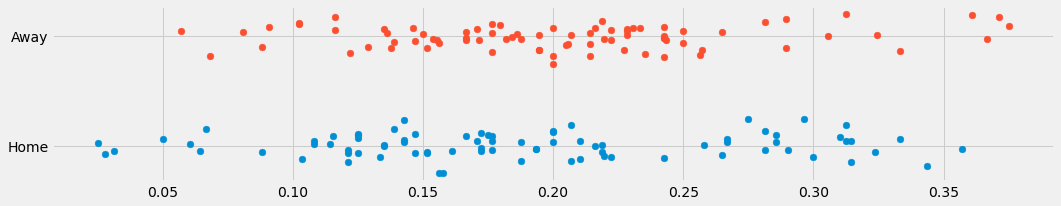

In [83]:
# SS/AB HOME vs. AWAY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(astros_home_SoAb, 
           np.repeat(0, len(astros_home_BbAb)) + \
           np.random.normal(0, 0.1, len(astros_home_BbAb)), ## jitter
           s=45)
ax.scatter(astros_away_SoAb, 
           np.repeat(1, len(astros_away_BbAb)) + \
           np.random.normal(0, 0.1, len(astros_away_BbAb)), 
           s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Home", "Away"]);

In [83]:
print(astros_home_BbAb.mean())
print(yankees_home_BbAb.mean())
print(dodgers_home_BbAb.mean())
print(redsox_home_BbAb.mean())

list_field_home_bbab = [yankees_home_BbAb.mean(), dodgers_home_BbAb.mean(), redsox_home_BbAb.mean()]
arr_field_home_bbab = np.array(list_field_home_bbab)

print((astros_home_SoAb.mean() - arr_field_home_soab.mean()))

arr_field_home_bbab.mean()

0.08566245119553516
0.1162341190267757
0.11739305753859244
0.10293266258842577
-0.05305389081388795


0.11218661305126464

In [84]:
print(astros_away_BbAb.mean())
print(yankees_away_BbAb.mean())
print(dodgers_away_BbAb.mean())
print(redsox_away_BbAb.mean())

list_field_away_bbab = [yankees_away_BbAb.mean(), dodgers_away_BbAb.mean(), redsox_away_BbAb.mean()]
arr_field_away_bbab = np.array(list_field_away_bbab)

print((astros_away_BbAb.mean() - arr_field_away_bbab.mean()))

arr_field_away_bbab.mean()

0.09646287836801411
0.10544476198569479
0.12342118055527636
0.09995945547206697
-0.013145587636331932


0.10960846600434604

* Baseball Reference uses MEDIAN over MEAN for all of its averages. Would using MEAN over MEDIAN effect outlieres that may be important for my test?
** it would because some games had unusually (exciting) scores. 

In [85]:
astros2017df.head()

,Gtm,Date,Home,Opp,Rslt,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,LOB,#,Thr,Opp. Starter (GmeSc),GmeSc,SoAb,BbAb
0,1.0,Apr 3,True,SEA,"W,3-0",30.0,27.0,3.0,6.0,0.0,0.0,2.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.222,0.241,0.444,0.686,3.0,10.0,R,F.Hernandez(55),55,0.222222,0.037037
1,2.0,Apr 4,True,SEA,"W,2-1",29.0,26.0,2.0,5.0,0.0,0.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.208,0.259,0.434,0.693,3.0,10.0,R,H.Iwakuma(55),55,0.115385,0.115385
2,3.0,Apr 5,True,SEA,"W,5-3",55.0,51.0,5.0,13.0,4.0,0.0,1.0,5.0,3.0,0.0,9.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.231,0.277,0.413,0.690,12.0,11.0,L,J.Paxton(72),72,0.176471,0.058824
3,4.0,Apr 6,True,SEA,"L,2-4",36.0,32.0,2.0,6.0,0.0,0.0,2.0,2.0,3.0,1.0,10.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.221,0.277,0.404,0.681,7.0,11.0,L,A.Miranda(50),50,0.312500,0.093750
4,5.0,Apr 7,True,KCR,"L,1-5",33.0,30.0,1.0,6.0,1.0,0.0,0.0,1.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.217,0.276,0.373,0.650,5.0,10.0,L,J.Vargas(61),61,0.266667,0.100000


In [91]:
astros2017df['GmeSc'].unique()

array(['55', '72', '50', '61', '54', '75', '42', '35', '51', '62', '60',
       '52', '68', '44', '48', '45', '28', '76', '43', '21', '24', '56',
       '46', '32', '11', '67', '12', '79', '53', '34', '20', '65', '33',
       '31', '40', '69', '29', '26', '39', '(3', '49', '47', '15', '37',
       '64', '27', '25', '73', '(7', '23', '71', '74', '82', '57', '38',
       '78', '59', '22', '63', '58'], dtype=object)

In [93]:
astros2017df['GmeSc'].head(20)

0     55
1     55
2     72
3     50
4     61
5     54
6     54
7     75
8     42
9     35
10    51
11    62
12    60
13    51
14    52
15    68
16    44
17    48
18    45
19    50
Name: GmeSc, dtype: object